In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_51380_R')

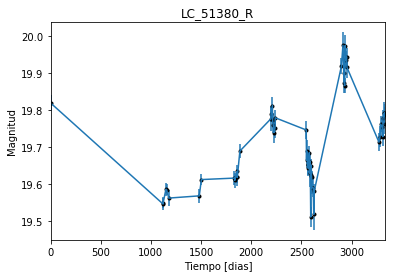

In [2]:
data = np.genfromtxt('LC_51380_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_51380_R')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

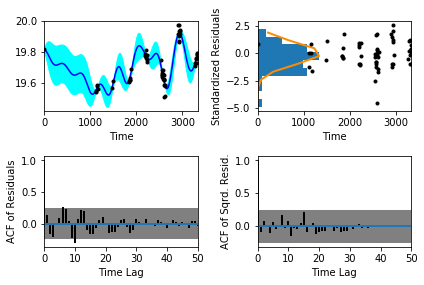

In [5]:
sample.assess_fit()

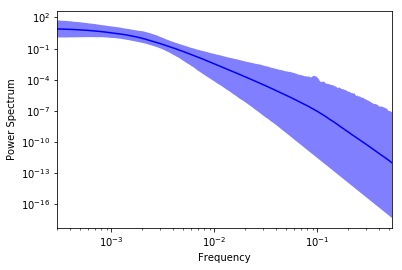

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_51380_R')

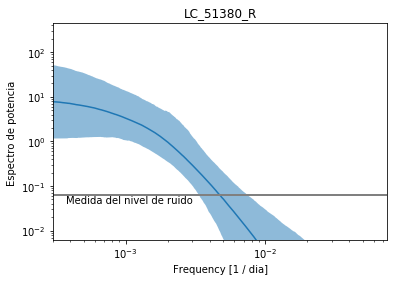

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_51380_R')

Text(0.5,1,'Prediccion , valor esperado LC_51380_R')

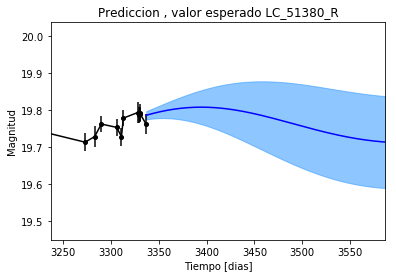

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_51380_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_51380_R')

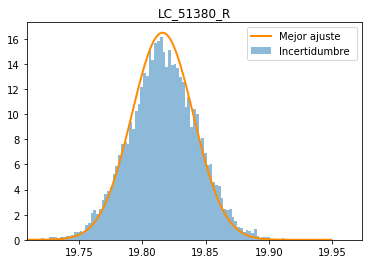

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_51380_R')

Text(0.5,1,'Interpolacion, camino simulado LC_51380_R')

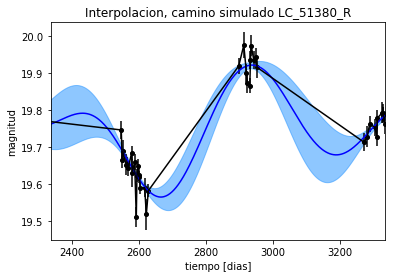

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_51380_R')

Text(0.5,1,'Interpolacion, camino simulado LC_51380_R')

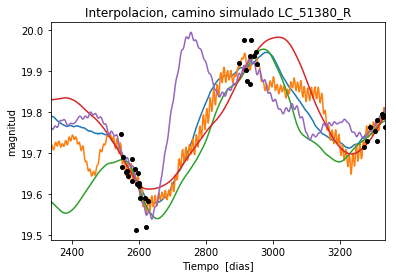

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_51380_R')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 628.901081295
Median: 0.00887867804456
Standard deviation: 0.200378332545
68% credibility interval: [ 0.00083781  0.19510188]
95% credibility interval: [  3.61952203e-04   7.89372662e-01]
99% credibility interval: [  3.11597471e-04   1.02303348e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 554.194121689
Median: 0.00172444486951
Standard deviation: 0.0688916828898
68% credibility interval: [ 0.00054209  0.01630211]
95% credibility interval: [ 0.00032717  0.18505426]
99% credibility interval: [  3.04165071e-04   5.02999452e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 316.574995015
Median: 0.0113549397177
Standard

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1844.35916501
Median: 133.48737997
Standard deviation: 1.67930364913
68% credibility interval: [ 131.66744548  134.72873445]
95% credibility interval: [ 129.03454461  135.50593614]
99% credibility interval: [ 126.79930794  135.97454778]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 445.56612986
Median: 0.70408430419
Standard deviation: 2.00254566483
68% credibility interval: [ 0.0545572   3.52134364]
95% credibility interval: [ 0.01739242  6.78563785]
99% credibility interval: [ 0.01208022  8.79096471]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 388.229533133
Median: 0.300570660757
Standard deviation: 8.71639399811
68% credibility interval: [ 0.02253335  5.94835231]
95% credibility interval: [  1.53646221e-03 

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1427.65620686
Median: 2.86195626263e-25
Standard deviation: 4.57943314257e+29
68% credibility interval: [  4.76563987e-70   2.54617203e-05]
95% credibility interval: [  1.10797924e-134   6.29210895e+016]
99% credibility interval: [  9.71873583e-149   3.84782063e+028]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2667.43799436
Median: 19.7157641111
Standard deviation: 0.0710462781243
68% credibility interval: [ 19.65913475  19.77428702]
95% credibility interval: [ 19.57789278  19.86114218]
99% credibility interval: [ 19.49018391  19.94846191]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 273.23530416
Median: 0.00202064323237
Standard deviation: 0.244726550023
68% credibility interval: [ 0.          0.28593343]
95% credibility interval: [ 0.          0.91344627]
99% credibility interval: [ 0.          1.03550565]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 273.23530416
Median: 0.00202064323237
Standard deviation: 0.244726550023
68% credibility interval: [ 0.          0.28593343]
95% credibility interval: [ 0.          0.91344627]
99% credibility interval: [ 0.          1.03550565]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 555.432263576
Median: 0.0
Standard deviation: 0.000585993304247
68% cr

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1844.35916501
Median: 133.48737997
Standard deviation: 1.67930364913
68% credibility interval: [ 131.66744548  134.72873445]
95% credibility interval: [ 129.03454461  135.50593614]
99% credibility interval: [ 126.79930794  135.97454778]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 3478.70962534
Median: 0.020000980991
Standard deviation: 0.0284861317944
68% credibility interval: [ 0.01201481  0.03781413]
95% credibility interval: [ 0.00791562  0.08752194]
99% credibility interval: [ 0.0058275   0.18583305]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1571.83236828
Median: 1.2810583665
Standard deviation: 0.197961639029
68% credibility interval: [ 1.10169782  1.48812234]
95% credibility interval: [ 0.95200762  1.73568049]
99% credibility interval: [ 0.87356916  1.88149695]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1108.85656683
Median: 7.22805481641e-05
Standard deviation: 0.025298756463
68% credibility interval: [  2.65376369e-06   2.11595179e-03]
95% credibility interval: [  4.73363791e-21   1.74434506e-02]
99% credibility interval: [  7.16612151e-33   1.48420433e-01]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 628.901081295
Median: (-0.0557863794367-0.0839685827842j)
Standard deviation: 1.98734042862
68% credibility interval: [-1.22586123-3.65734062j -0.00526410-0.00400653j]
95% credibility interval: [ -4.95977471e+00-0.12135169j  -2.27421277e-03-0.00489695j]
99% credibility interval: [ -6.42790892e+00+0.j          -1.95782465e-03-0.01350127j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 554.194121689
Median: (-0.0108350066671+0.01553962444j)
Standard deviation: 1.59742678445
68% credibility interval: [-0.10242917+0.03153624j -0.00340602+0.00788928j]
95% credibility interval: [-1.16273020+3.0041193j  -0.00205568+0.58134647j]
99% credibility interval: [ -3.16043877e+00+4.97727386j  -1.91112550e-03+0.j        ]
Posterior su